<a href="https://colab.research.google.com/github/MaggieHDez/ClassFiles/blob/main/practica8_MCHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 8. Análisis de un Dataset con Seaborn y Visualización Avanzada**
>**Alumno:** Margarita Cristina Hernández Delgadillo\
>**Matrícula:** 255879

##Objetivo:
Este ejercicio tiene como objetivo aprender a trabajar con seaborn para crear visualizaciones más avanzadas utilizando gráficos como el mapa de calor y el diagrama de violín. También, se les anima a explorar el dataset, hacer análisis descriptivos y aprender a interpretar los resultados.

Personaliza cada gráfico con títulos, etiquetas en los ejes y leyendas cuando sea necesario.
Experimenta con diferentes colores, estilos y tamaños para hacer que las visualizaciones sean claras y atractivas.

##Dataset:
En esta práctica, vamos a utilizar el dataset de "tips" de seaborn, que contiene información sobre las propinas que dejaron los clientes en un restaurante, junto con detalles sobre el total de la cuenta, el día de la semana, si fue almuerzo o cena, entre otros.

###Carga de Dataset

- Cargamos el dataset tips usando seaborn.
- Realizamos un análisis preliminar utilizando `.head()`, `.info()`, `.describe()` para obtener una visión general de los datos.
- Verificamos la existencia de valores nulos o datos faltantes.

In [140]:
import seaborn as sns

df = sns.load_dataset('tips')

print('\n************************Head***************************')
# Vista rápida del las primeras 5 filas de DataFrame
print(df.head())
print('\n************************Info***************************')
# Muestra un resumen conciso del DataFrame
print(df.info())
print('\n**********************Describe*************************')
# Muestra un resumen de las métricas estadísticas
# clave como conteo, la media, desviación estandar
# mínimo, máximo y los porcentajes
print(df.describe())
print('\n***********************IsNull**************************')
# Muestra el número de valores nulos
print(df.isnull().sum())


************************Head***************************
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

************************Info***************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

***********

##Mapa de Calor (Heatmap):

**Objetivo:** Visualizar la correlación entre las variables numéricas en el dataset.

**Instrucciones:** Utiliza un mapa de calor para mostrar la matriz de correlación entre las variables numéricas (`total_bill`, `tip`, `size`).

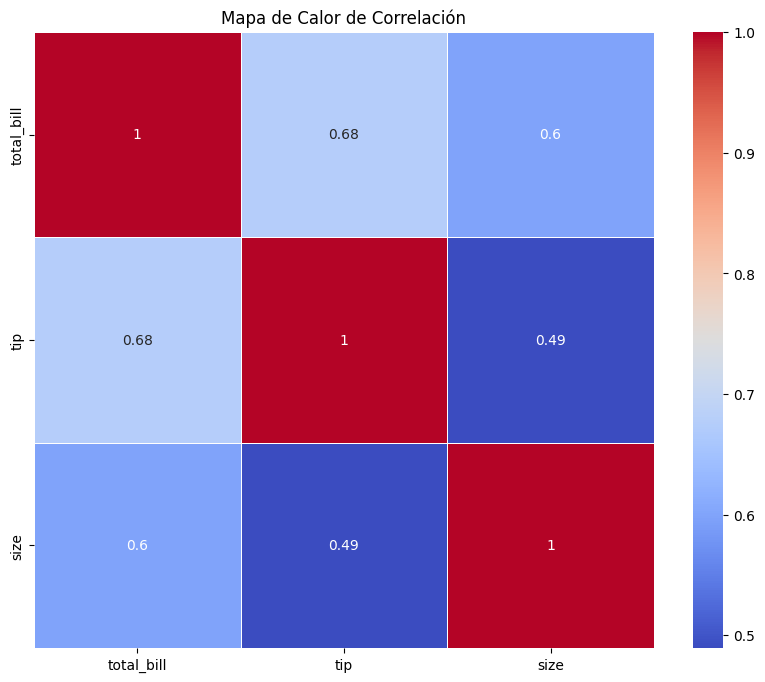

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

##Diagrama de Violín

**Objetivo:** Mostrar la distribución de las propinas (`tip`) para diferentes días de la semana.

**Instrucciones:** Utiliza un diagrama de violín para comparar cómo varía la distribución de las propinas en cada uno de los días (`day`).
Personaliza el gráfico con colores y etiquetas adecuadas.

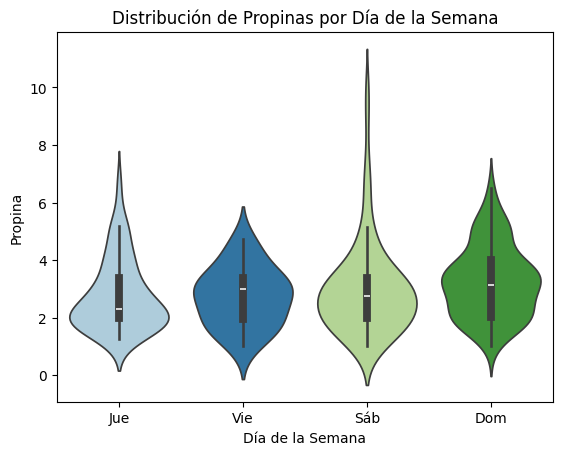

In [142]:
# Mapeo de días en inglés a días en español para traducir
day_mapping = {
    'Mon': 'Lun',
    'Tue': 'Mar',
    'Wed': 'Mié',
    'Thur': 'Jue',
    'Fri': 'Vie',
    'Sat': 'Sáb',
    'Sun': 'Dom'
}

# Convertir la columna 'day' a tipo categórico si no lo es. Esto para reemplazar los días
# de inglés a español
df['day'] = df['day'].astype('category')

# Renombrar las categorías utilizando rename_categories
df['day'] = df['day'].cat.rename_categories(day_mapping)

sns.violinplot(x='day', y='tip', data=df, hue='day', palette='Paired')
plt.title('Distribución de Propinas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Propina')
plt.show()

##Gráfico de dispersión (Scatter Plot):

**Objetivo:** Analizar la relación entre el total de la cuenta (`total_bill`) y la propina (`tip`).

**Instrucciones:** Crea un gráfico de dispersión con `total_bill` en el eje X y `tip` en el eje Y. Usa un color diferente para cada día de la semana.

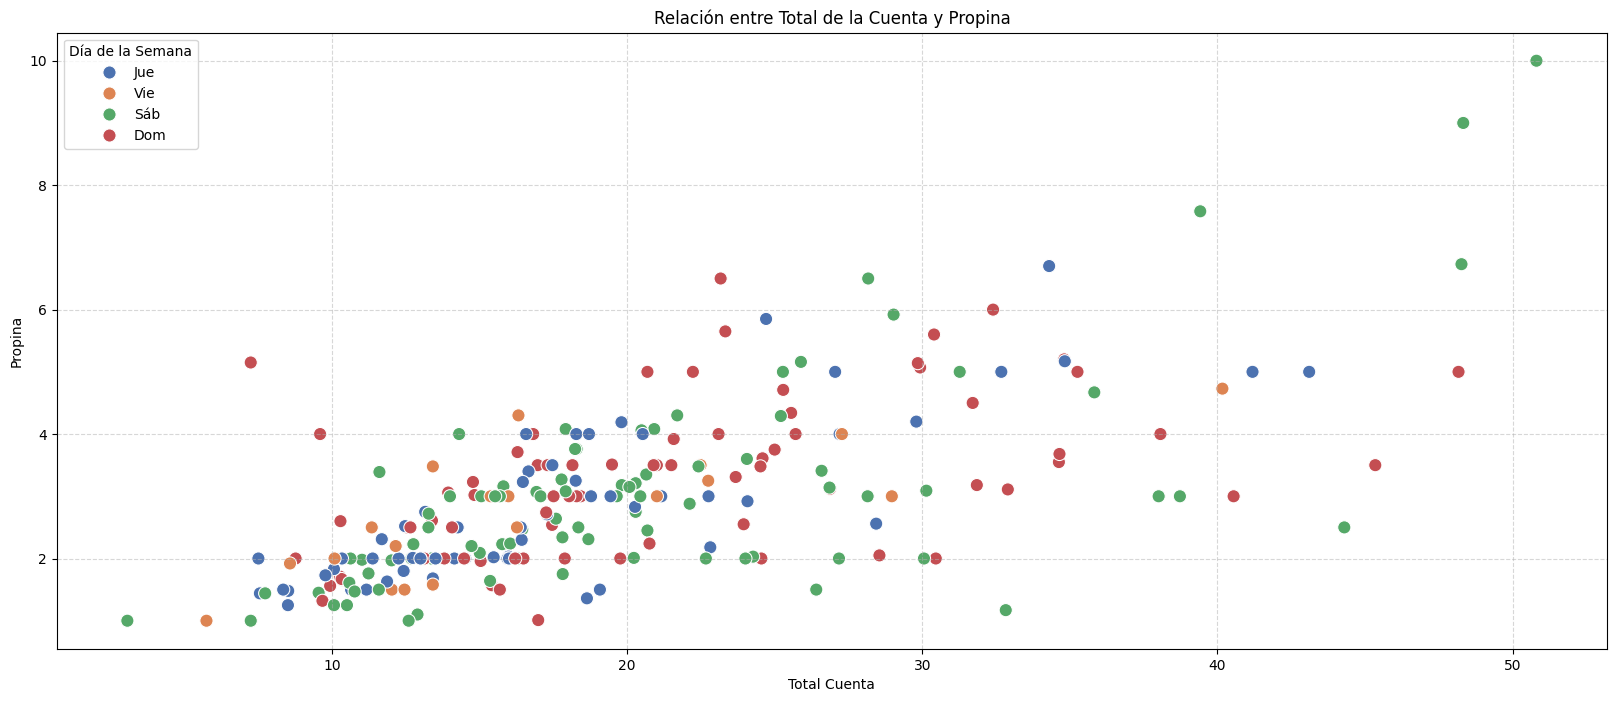

In [143]:
plt.figure(figsize=(20, 8))

sns.scatterplot(x='total_bill', y='tip', data=df, hue='day', palette='deep', s=90)
plt.title('Relación entre Total de la Cuenta y Propina')
plt.xlabel('Total Cuenta')
plt.ylabel('Propina')
plt.legend(title='Día de la Semana')

# Generamos líneas de referencia para mejor visibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

##Gráfico de barras (Bar Plot):

**Objetivo:** Comparar el promedio de la propina (`tip`) por género (`sex`).

**Instrucciones:** Utiliza un gráfico de barras para mostrar el promedio de las propinas por género (hombres y mujeres).

---
**NOTA:** Se incluyó un ciclo `for` que añade las etiquetas con la cantidad promedio de propina en cada barra.
- `barplot.patches` devuelve una lista de todas las barras en el gráfico
- `p` representa cada barra en el gráfico de barras.
- `barplot.annotate()` se usa para agregar texto a un gráfico.
- `f"{p.get_height():.2f}"` convierte ese número a un string con 2 decimales
- `(x, y)` representa la posición en la que aparecerá la etiqueta.
- `p.get_x()` obtiene la coordenada X de la barra (su posición en el eje X).
- `p.get_width() / 2` calcula la mitad del ancho de la barra, de modo que el texto se centre horizontalmente sobre ella.
- `p.get_x() + p.get_width() / 2` coloca la etiqueta en el centro de la barra.
- `p.get_height() + 0.2` sube la etiqueta un poco por encima de la barra para que no quede sobre ella.
- `ha='center' (horizontal alignment)` centra el texto horizontalmente.
- `va='bottom' (vertical alignment)` alinea el texto en la parte inferior (pero como lo elevamos con `p.get_height() + 0.2`, queda sobre la barra).
- `fontsize=10` establece el tamaño de la fuente en 10.
- `fontweight='bold'` hace que el texto sea negrita para mayor legibilidad.
- `color='black'` asegura que el texto sea negro y visible.
- `xytext=(0, 5)` mueve la etiqueta 5 píxeles hacia arriba, para separarla un poco más de la barra.
- `textcoords='offset points'` significa que el desplazamiento de xytext se mide en píxeles, no en coordenadas del gráfico.
---

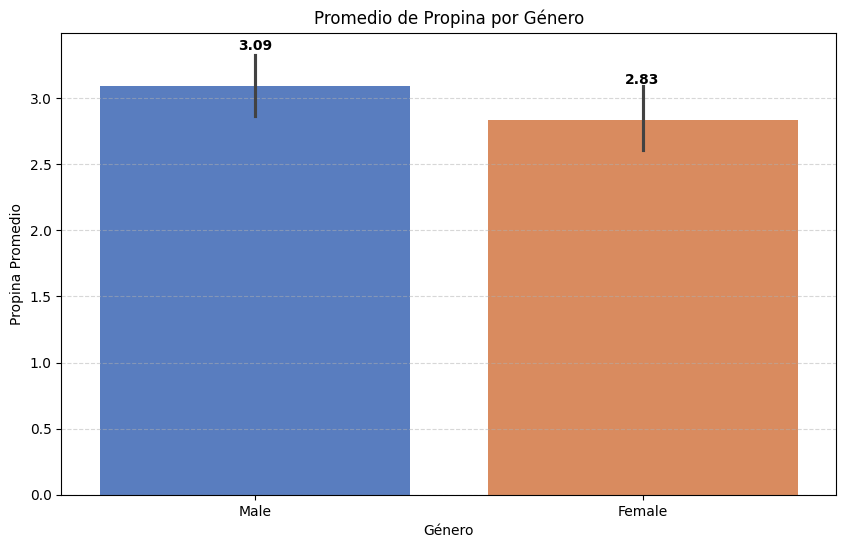

In [144]:
import numpy as np

plt.figure(figsize=(10, 6))

barplot = sns.barplot(x='sex', y='tip', data=df, estimator=np.mean, hue='sex', palette='muted')
plt.title('Promedio de Propina por Género')
plt.xlabel('Género')
plt.ylabel('Propina Promedio')

# Añadir etiquetas con la cantidad promedio de propina en cada barra
for p in barplot.patches:
    barplot.annotate(f"{p.get_height():.2f}",
                     (p.get_x() + p.get_width() / 2, p.get_height() + 0.2),
                     ha='center', va='bottom', fontsize=10, fontweight='bold',
                     color='black', xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()